In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [68]:
import warnings
import sys 
if not sys.warnoptions:
    warnings . simplefilter( "ignore" )

In [69]:
# Load the dataset
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Employee.csv")

### Data Exploration: 
Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

In [70]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [71]:
# List unique values and their count for each column
print("\nUnique values in each feature:")
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    print(f"{col}: {len(unique_vals)} unique values")
    print(unique_vals[:10])  # Displaying first 10 unique values


Unique values in each feature:
Company: 6 unique values
['TCS' 'Infosys' 'CTS' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: 29 unique values
[20. 30. 35. 40. 23. 34. 45. 18. 22. 32.]
Salary: 40 unique values
[2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234.]
Place: 11 unique values
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur']
Country: 1 unique values
['India']
Gender: 2 unique values
[0 1]


In [72]:
# Perform statistical analysis
df.describe()


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [73]:
# Renaming columns for better readability
column_mapping = {
    "Company": "Company_Name",
    "Age": "Employee_Age",
    "Salary": "Employee_Salary",
    "Place": "Location",
    "Country": "Country_Name",
    "Gender": "Gender_Code"
}
df.rename(columns=column_mapping, inplace=True)


In [74]:
print("\nUpdated Column Names:")
print(df.columns)



Updated Column Names:
Index(['Company_Name', 'Employee_Age', 'Employee_Salary', 'Location',
       'Country_Name', 'Gender_Code'],
      dtype='object')


In [75]:
# Standardizing company names
def standardize_company(name):
    name = name.strip().lower()
    if name in ["tcs", "tata consultancy services"]:
        return "TCS"
    elif name in ["infosys", "infosys pvt lmt"]:
        return "Infosys"
    elif name in ["cts", "cognizant", "congnizant"]:
        return "Cognizant"
    else:
        return "Other"

df["Company_Name"] = df["Company_Name"].astype(str).apply(standardize_company)

print("\nStandardized Company Names:")
print(df["Company_Name"].unique())


Standardized Company Names:
['TCS' 'Infosys' 'Cognizant' 'Other']


### Data Cleaning
Find the missing and inappropriate values, treat them appropriately. 
Remove all duplicate rows. 
Find the outliers. 
Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [77]:
# Replace 0 in Age with NaN
df["Employee_Age"] = df["Employee_Age"].replace(0, np.nan)

In [78]:
# Handling missing values using mean/median/mode
df["Employee_Age"].fillna(df["Employee_Age"].median(), inplace=True)
df["Employee_Salary"].fillna(df["Employee_Salary"].mean(), inplace=True)
df["Location"].fillna(df["Location"].mode()[0], inplace=True)
df["Company_Name"].fillna(df["Company_Name"].mode()[0], inplace=True)


In [79]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [80]:
# Identifying outliers using IQR
Q1 = df["Employee_Age"].quantile(0.25)
Q3 = df["Employee_Age"].quantile(0.75)
IQR = Q3 - Q1
age_outliers = df[(df["Employee_Age"] < (Q1 - 1.5 * IQR)) | (df["Employee_Age"] > (Q3 + 1.5 * IQR))]

age_outliers


,Company_Name,Employee_Age,Employee_Salary,Location,Country_Name,Gender_Code


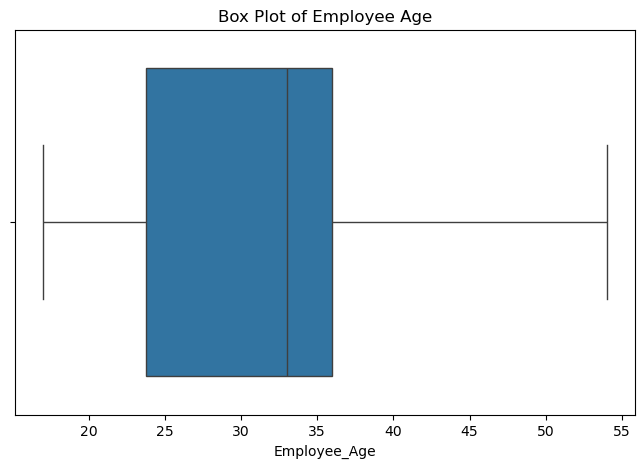

In [81]:
# Plot outliers using box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Employee_Age"])
plt.title("Box Plot of Employee Age")
plt.show()


### Data Analysis:
Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually

In [82]:
# Filtering data where age > 40 and salary < 5000
filtered_df = df[(df["Employee_Age"] > 40) & (df["Employee_Salary"] < 5000)]
filtered_df

,Company_Name,Employee_Age,Employee_Salary,Location,Country_Name,Gender_Code
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


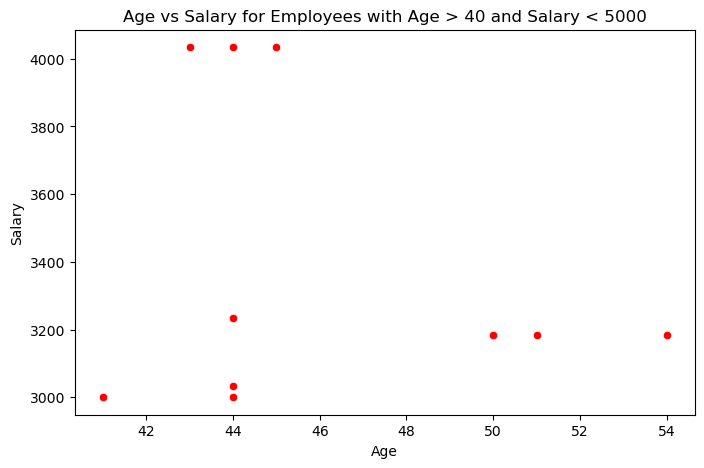

In [83]:
# Plot Age vs Salary for filtered data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_df["Employee_Age"], y=filtered_df["Employee_Salary"], color='red')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary for Employees with Age > 40 and Salary < 5000")
plt.show()

In [84]:
# Count number of people from each place
place_counts = df["Location"].value_counts()
place_counts

Location
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

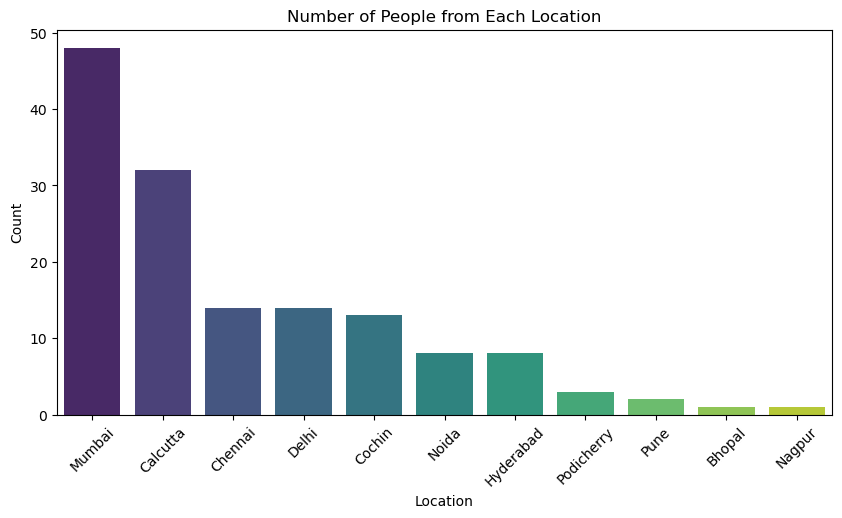

In [85]:
# Plot count of people from each location
plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values, palette="viridis")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Number of People from Each Location")
plt.xticks(rotation=45)
plt.show()

### Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable 
for analysis by machine learning algorithms.


In [86]:
#label encoding
label_encoders = {}
categorical_columns = ["Company_Name", "Location", "Country_Name", "Gender_Code"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [87]:
# One-hot encoding 
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


### Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [88]:
# Feature Scaling
print("\nScaling features using StandardScaler and MinMaxScaler...")
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numerical_columns = ["Employee_Age", "Employee_Salary"]
df_standard_scaled = df.copy()
df_minmax_scaled = df.copy()

df_standard_scaled[numerical_columns] = scaler_standard.fit_transform(df[numerical_columns])
df_minmax_scaled[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])



Scaling features using StandardScaler and MinMaxScaler...


In [89]:
# Save cleaned and scaled dataset
df_standard_scaled.to_csv("Cleaned_Employee_StandardScaled.csv", index=False)
df_minmax_scaled.to_csv("Cleaned_Employee_MinMaxScaled.csv", index=False)
print("\nCleaned and scaled datasets saved as 'Cleaned_Employee_StandardScaled.csv' and 'Cleaned_Employee_MinMaxScaled.csv'")



Cleaned and scaled datasets saved as 'Cleaned_Employee_StandardScaled.csv' and 'Cleaned_Employee_MinMaxScaled.csv'
